In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import nltk
import string
import re

In [2]:
#đặt kích thước cho figure
plt.rcParams['figure.figsize'] = 10,7
#tắt chế độ lưới trên biểu đồ
plt.rcParams['axes.grid']=False

In [3]:
#tắt cảnh bảo
import warnings
warnings.filterwarnings('ignore')

In [4]:
#tải dữ liệu lên
reviews = pd.read_csv("D:\\Workspace-CTU\\Nien_luan_co_so\\Data_Movie.csv")

In [5]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
reviews.shape

(2000, 2)

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
#tính số giá trị thiếu (Nan) trong dữ liệu
reviews.isna().sum().sum()

0

# Làm gọn bảng

In [9]:
reviews = reviews.drop(['sentiment'], axis=1)

In [10]:
reviews.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


# Xử lý ký tự

In [11]:
#chuyển tất cả thành chữ thường
def text_lowercase(text):
    return text.lower()


reviews['review_clean'] = reviews['review'].apply(text_lowercase)

In [12]:
reviews.head()

,review,review_clean
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...,a wonderful little production. the filming te...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...","petter mattei's ""love in the time of money"" is..."


# Xóa ký tự đặc biệt

In [13]:
reviews.head()

,review,review_clean
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...,a wonderful little production. the filming te...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...","petter mattei's ""love in the time of money"" is..."


In [14]:
import string
#chuỗi chứa các ký tự đặc biệt
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def xoa_kyTuDacBiet(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text
reviews['review_clean'] = reviews['review_clean'].apply(xoa_kyTuDacBiet)

In [16]:
reviews.head()

,review,review_clean
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


# Xóa khoảng trắng dư thừa

In [17]:
def xoa_khoangTrang(text):
    return " ".join(text.split())
reviews['review_clean'] = reviews['review_clean'].apply(lambda x:xoa_khoangTrang(x))

In [18]:
display(reviews)

,review,review_clean
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...",feeling minnesota directed by steven baigelman...
1996,"THE CELL (2000) Rating: 8/10 The Cell, like An...",the cell 2000 rating 810 the cell like antz mu...
1997,"This movie, despite its list of B, C, and D li...",this movie despite its list of b c and d list ...
1998,I loved this movie! It was all I could do not ...,i loved this movie it was all i could do not t...


# Tách từ

In [19]:
import re
def tachTu(text):
    chuoi = re.split(' ', text);
    return chuoi


In [20]:
chuoi = tachTu("ngo thanh phuong")
print(chuoi)

['ngo', 'thanh', 'phuong']


In [21]:
reviews['review_clean'] = reviews['review_clean'].apply(lambda x: tachTu(x))
display(reviews)

,review,review_clean
0,One of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. The filming te...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, in, the, time, of, mon..."
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...","[feeling, minnesota, directed, by, steven, bai..."
1996,"THE CELL (2000) Rating: 8/10 The Cell, like An...","[the, cell, 2000, rating, 810, the, cell, like..."
1997,"This movie, despite its list of B, C, and D li...","[this, movie, despite, its, list, of, b, c, an..."
1998,I loved this movie! It was all I could do not ...,"[i, loved, this, movie, it, was, all, i, could..."


# Loại bỏ các từ không có ý nghĩa

In [22]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngoth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop = stopwords.words('english')

In [25]:
def xoa_TuVoNghia(text_list):
    result = [word for word in text_list if word not in stop]
    return result

In [26]:
print(xoa_TuVoNghia(["Hello","my","name","is","Phuong","what","is","this"]))

['Hello', 'name', 'Phuong']


In [27]:
reviews['review_clean'] = reviews['review_clean'].apply(lambda x: xoa_TuVoNghia(x))

In [28]:
display(reviews)

,review,review_clean
0,One of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. The filming te...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, time, money, visually,..."
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...","[feeling, minnesota, directed, steven, baigelm..."
1996,"THE CELL (2000) Rating: 8/10 The Cell, like An...","[cell, 2000, rating, 810, cell, like, antz, mu..."
1997,"This movie, despite its list of B, C, and D li...","[movie, despite, list, b, c, list, celebs, com..."
1998,I loved this movie! It was all I could do not ...,"[loved, movie, could, break, tears, watching, ..."


# Lemmatization

In [29]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer().lemmatize

In [30]:
print(lemmatizer("rocks"))
print(lemmatizer("better", pos="a"))

rock
good


In [31]:
def lemmatizing(text):
    lemmatizing = [lemmatizer(word) for word in text]
    return lemmatizing

In [32]:
reviews['review_clean'] = reviews['review_clean'].apply(lemmatizing)

In [33]:
display(reviews)

,review,review_clean
0,One of the other reviewers has mentioned that ...,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,A wonderful little production. The filming te...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,"[basically, there, family, little, boy, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, time, money, visually,..."
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...","[feeling, minnesota, directed, steven, baigelm..."
1996,"THE CELL (2000) Rating: 8/10 The Cell, like An...","[cell, 2000, rating, 810, cell, like, antz, mu..."
1997,"This movie, despite its list of B, C, and D li...","[movie, despite, list, b, c, list, celebs, com..."
1998,I loved this movie! It was all I could do not ...,"[loved, movie, could, break, tear, watching, r..."


# Đếm từ xuất hiện nhiều

In [34]:
word_count={}
for chuoi in reviews['review_clean']:
    for word in chuoi:
        if word not in word_count:
            word_count[word]=1
        else:
            word_count[word]+=1

In [35]:
word_count

{'one': 2058,
 'reviewer': 39,
 'mentioned': 52,
 'watching': 370,
 '1': 99,
 'oz': 11,
 'episode': 180,
 'youll': 110,
 'hooked': 15,
 'right': 258,
 'exactly': 75,
 'happened': 62,
 'first': 654,
 'thing': 641,
 'struck': 13,
 'brutality': 4,
 'unflinching': 2,
 'scene': 866,
 'violence': 94,
 'set': 240,
 'word': 168,
 'go': 609,
 'trust': 20,
 'show': 623,
 'faint': 4,
 'hearted': 5,
 'timid': 2,
 'pull': 38,
 'punch': 23,
 'regard': 36,
 'drug': 89,
 'sex': 127,
 'hardcore': 13,
 'classic': 165,
 'use': 157,
 'called': 113,
 'nickname': 3,
 'given': 152,
 'oswald': 4,
 'maximum': 10,
 'security': 12,
 'state': 51,
 'penitentary': 1,
 'focus': 50,
 'mainly': 36,
 'emerald': 1,
 'city': 93,
 'experimental': 6,
 'section': 10,
 'prison': 43,
 'cell': 25,
 'glass': 18,
 'front': 56,
 'face': 152,
 'inwards': 1,
 'privacy': 1,
 'high': 135,
 'agenda': 3,
 'em': 10,
 'home': 160,
 'manyaryans': 1,
 'muslim': 8,
 'gangsta': 2,
 'latino': 6,
 'christian': 23,
 'italian': 54,
 'irish': 16,

In [36]:
#chuyển thành dataFrame
df = pd.DataFrame(word_count.items(), columns=['word', 'word_count'])
df = df.sort_values('word_count', ascending=False).reset_index(drop=True)

In [37]:
display(df)

,word,word_count
0,movie,4117
1,film,3531
2,one,2058
3,like,1515
4,time,1122
...,...,...
25937,jnr,1
25938,worsens,1
25939,necessitating,1
25940,selznick,1


# SENTIMENT ANALYSIS

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
analyser=SentimentIntensityAnalyzer()

def sentiment_pos(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['pos']

def sentiment_neg(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neg']

def sentiment_neu(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neu']

def sentiment_comp(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['comp']

In [40]:
df['positive']=df['word'].apply(sentiment_pos)
df['negative']=df['word'].apply(sentiment_neg)
df['neutral']=df['word'].apply(sentiment_neu)

In [41]:
display(df)

,word,word_count,positive,negative,neutral
0,movie,4117,0.0,0.0,1.0
1,film,3531,0.0,0.0,1.0
2,one,2058,0.0,0.0,1.0
3,like,1515,1.0,0.0,0.0
4,time,1122,0.0,0.0,1.0
...,...,...,...,...,...
25937,jnr,1,0.0,0.0,1.0
25938,worsens,1,0.0,1.0,0.0
25939,necessitating,1,0.0,0.0,1.0
25940,selznick,1,0.0,0.0,1.0


In [42]:
df1=df.loc[df.positive>0]['word']
df1

3                  like
5                  good
15                 well
20                great
42                 love
              ...      
25548              pray
25654        glamorized
25715    sentimentalist
25872      brilliantine
25881           revives
Name: word, Length: 1066, dtype: object

In [43]:
df2=df.loc[df.negative>0]['word']
df2

19              bad
121          horror
143           worst
161            hard
162             war
            ...    
25786       disdain
25795         grimy
25861    unfriendly
25935     worsening
25938       worsens
Name: word, Length: 1426, dtype: object

In [44]:
df3=df.loc[df.neutral>0]['word']
df3

0                movie
1                 film
2                  one
4                 time
6            character
             ...      
25936           livein
25937              jnr
25939    necessitating
25940         selznick
25941         backward
Name: word, Length: 23419, dtype: object

In [45]:
## CLASSIFICATION OF REVIEW
reviews['positive']=reviews['review'].apply(sentiment_pos)
reviews['negative']=reviews['review'].apply(sentiment_neg)
reviews['neutral']=reviews['review'].apply(sentiment_neu)

In [46]:
display(reviews)

,review,review_clean,positive,negative,neutral
0,One of the other reviewers has mentioned that ...,"[one, reviewer, mentioned, watching, 1, oz, ep...",0.049,0.206,0.745
1,A wonderful little production. The filming te...,"[wonderful, little, production, filming, techn...",0.177,0.055,0.768
2,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",0.218,0.093,0.689
3,Basically there's a family where a little boy ...,"[basically, there, family, little, boy, jake, ...",0.088,0.140,0.773
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, time, money, visually,...",0.162,0.052,0.786
...,...,...,...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...","[feeling, minnesota, directed, steven, baigelm...",0.048,0.118,0.834
1996,"THE CELL (2000) Rating: 8/10 The Cell, like An...","[cell, 2000, rating, 810, cell, like, antz, mu...",0.258,0.043,0.699
1997,"This movie, despite its list of B, C, and D li...","[movie, despite, list, b, c, list, celebs, com...",0.091,0.103,0.806
1998,I loved this movie! It was all I could do not ...,"[loved, movie, could, break, tear, watching, r...",0.171,0.217,0.613


In [47]:
sentiment_neg("Today is a normal day")

0.0

In [48]:
sentiment_pos("wheather is not bad")

0.487

In [49]:
sentiment_neu("wheather is not bad")

0.513

In [50]:
sentiment_neg("wheather is not bad")

0.0

# WordCloud

In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
comment_words=''
stopwords=set(STOPWORDS)

for x in reviews.review:
    
    x=str(x)
    
    tokens=x.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    for y in tokens:
        comment_words=comment_words+y+' '

In [54]:
comment_words

'one of the other reviewers has mentioned that after watching just 1 oz episode you\'ll be hooked. they are right, as this is exactly what happened with me. the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word. it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. i would say the main appeal of the show is due to the fact that it goes where other show

In [55]:
wordcloud=WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

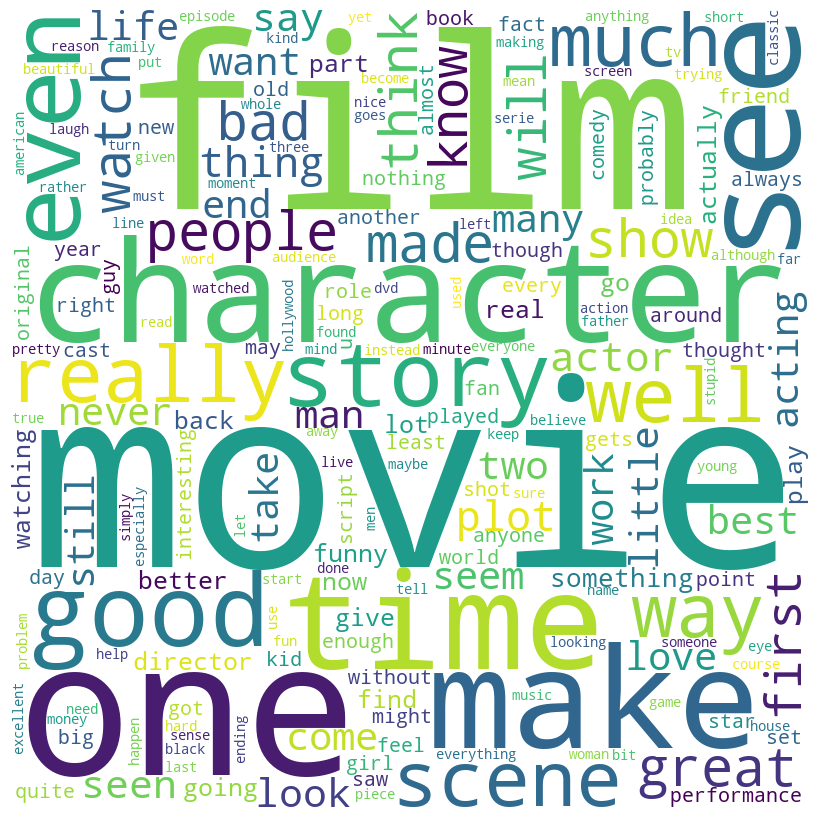

In [56]:
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Xác định các chủ đề chính của vấn đề sử dụng thuật toán K-Means

In [57]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
## getting the negative reviews for identifying the key themes of problems
problems=reviews.loc[reviews.negative>0]['review']
problems.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production.  The filming te...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

# VECTORIZING RAW DATA: TF-IDF

In [66]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(problems)

In [67]:
X

<1931x24789 sparse matrix of type '<class 'numpy.float64'>'
	with 170834 stored elements in Compressed Sparse Row format>

In [68]:
k=3
model = KMeans(init='k-means++', n_clusters=3, n_init=10,max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',     
    )
model.fit(X)

KMeans(algorithm='auto', n_clusters=3, n_init=10)

In [69]:
## getting the centroids and features
centroids= model.cluster_centers_.argsort()[:, ::-1]
features=vectorizer.get_feature_names_out()

In [70]:
for i in range(0,3):
    print('\n\nCluster %d:' % i)
    for ind in centroids[i, :10]:
        print('\t  - %s' % features[ind])



Cluster 0:
	  - film
	  - films
	  - like
	  - just
	  - good
	  - movie
	  - story
	  - plot
	  - great
	  - acting


Cluster 1:
	  - movie
	  - bad
	  - like
	  - movies
	  - just
	  - good
	  - really
	  - don
	  - watch
	  - think


Cluster 2:
	  - film
	  - movie
	  - just
	  - like
	  - story
	  - good
	  - time
	  - great
	  - little
	  - life


In [64]:
### predicting the text sentence and tell into which cluster the sentence belongs to.
X=vectorizer.transform(reviews.review)
reviews['cluster']=model.predict(X)
reviews.head()

,review,review_clean,positive,negative,neutral,cluster
0,One of the other reviewers has mentioned that ...,"[one, reviewer, mentioned, watching, 1, oz, ep...",0.049,0.206,0.745,1
1,A wonderful little production. The filming te...,"[wonderful, little, production, filming, techn...",0.177,0.055,0.768,1
2,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",0.218,0.093,0.689,1
3,Basically there's a family where a little boy ...,"[basically, there, family, little, boy, jake, ...",0.088,0.140,0.773,0
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, time, money, visually,...",0.162,0.052,0.786,1
